In [1]:
DB_PATH = '[...PATH...]/alexatop1m/data/openintel-alexa1m/processed'
PLOT_PATH = './plots/'

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore", module="numpy")

# define global plot parameters
params = {'axes.labelsize' : 10, 'axes.titlesize' : 10,
          'font.size' : 10, 'legend.fontsize' : 10,
          'xtick.labelsize' : 10, 'ytick.labelsize' : 10}
plt.rcParams.update(params)
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
num_sites = pd.read_csv('[...PATH...]/alexatop1m/num-alexa-sites.csv')

In [4]:
num_sites['day'] = pd.to_datetime(num_sites['day'])

In [5]:
num_sites = num_sites.set_index('day')

In [6]:
num_sites.describe()

,num_sites
count,31.000000
mean,733447.709677
std,117049.795315
min,537433.000000
25%,620011.000000
50%,759052.000000
75%,847003.500000
max,888703.000000


In [7]:
num_sites

,num_sites
day,
2019-12-01,762478
2019-12-02,639508
2019-12-03,624537
2019-12-04,887649
2019-12-05,888703
2019-12-06,879224
2019-12-07,846434
2019-12-08,784742
2019-12-09,631859


In [8]:
num_sites.min()

num_sites    537433
dtype: int64

In [10]:
conn = sqlite3.connect('[...PATH...]/%s/dns_with_alexa_cdn_pen-HYBRID.db' % DB_PATH)

v4 = pd.read_sql_query('select * from df_cdn_penetration_v4', conn)
v6 = pd.read_sql_query('select * from df_cdn_penetration_v6', conn)

blogspot = pd.read_sql_query('select * from df_cdn_penetration_blogspot', conn)

conn.close()

In [11]:
v4

,top_max_rank,query_type,cdn_penetration,cdn_name,type
0,1.0,A,1.000000,All,All
1,1.0,A,0.000000,Cloudflare,CDN div all
2,1.0,A,0.000000,Cloudflare,CDN div rank
3,1.0,A,0.000000,Amazon,CDN div all
4,1.0,A,0.000000,Amazon,CDN div rank
...,...,...,...,...,...
2179,1000000.0,A,0.003430,LeaseWeb CDN,CDN div rank
2180,1000000.0,A,0.011993,Incapsula,CDN div all
2181,1000000.0,A,0.002831,Incapsula,CDN div rank
2182,1000000.0,A,0.009148,Rackspace,CDN div all


In [12]:
v6

,top_max_rank,query_type,cdn_penetration,cdn_name,type
0,1.0,AAAA,1.000000,All,All
1,1.0,AAAA,0.000000,Cloudflare,CDN div all
2,1.0,AAAA,0.000000,Cloudflare,CDN div rank
3,1.0,AAAA,1.000000,Google,CDN div all
4,1.0,AAAA,1.000000,Google,CDN div rank
...,...,...,...,...,...
2179,1000000.0,AAAA,0.000129,Incapsula,CDN div rank
2180,1000000.0,AAAA,0.000424,LeaseWeb CDN,CDN div all
2181,1000000.0,AAAA,0.000054,LeaseWeb CDN,CDN div rank
2182,1000000.0,AAAA,0.000265,Rackspace,CDN div all


In [13]:
v4[v4['cdn_name'] == 'Cloudflare'].max()

top_max_rank              1e+06
query_type                    A
cdn_penetration        0.491644
cdn_name             Cloudflare
type               CDN div rank
dtype: object

In [14]:
overview_v4 = v4[v4['type'] == 'All']
overview_v6 = v6[v6['type'] == 'All']

In [15]:
overview_v4

,top_max_rank,query_type,cdn_penetration,cdn_name,type
0,1.0,A,1.000000,All,All
21,10.0,A,0.600000,All,All
42,100.0,A,0.600000,All,All
63,1000.0,A,0.586000,All,All
84,10000.0,A,0.556300,All,All
...,...,...,...,...,...
2079,960000.0,A,0.252946,All,All
2100,970000.0,A,0.250338,All,All
2121,980000.0,A,0.247784,All,All
2142,990000.0,A,0.245281,All,All


In [16]:
overview_v6

,top_max_rank,query_type,cdn_penetration,cdn_name,type
0,1.0,AAAA,1.000000,All,All
21,10.0,AAAA,0.400000,All,All
42,100.0,AAAA,0.260000,All,All
63,1000.0,AAAA,0.215000,All,All
84,10000.0,AAAA,0.233200,All,All
...,...,...,...,...,...
2079,960000.0,AAAA,0.130701,All,All
2100,970000.0,AAAA,0.129354,All,All
2121,980000.0,AAAA,0.128034,All,All
2142,990000.0,AAAA,0.126740,All,All


In [17]:
conn = sqlite3.connect('[...PATH...]/%s/dns_with_alexa-HYBRID.db' % DB_PATH)
aaaa_per_day = pd.read_sql('select count(*) \
                            from dns_alexa_v6 \
                            where date!="" \
                            group by date', con=conn)

aaaa_cdi_per_day = pd.read_sql('select count(*) \
                                from dns_alexa_v6 \
                                where date!="" and cdn=1 \
                                group by date', con=conn)

conn.close()

In [18]:
aaaa_per_day.median()

count(*)    153214.0
dtype: float64

In [19]:
aaaa_cdi_per_day.median()

count(*)    125473.0
dtype: float64

In [20]:
aaaa_cdi_per_day.median() / aaaa_per_day.median()

count(*)    0.81894
dtype: float64

In [21]:
overview_v4.head(15)

,top_max_rank,query_type,cdn_penetration,cdn_name,type
0,1.0,A,1.000000,All,All
21,10.0,A,0.600000,All,All
42,100.0,A,0.600000,All,All
63,1000.0,A,0.586000,All,All
84,10000.0,A,0.556300,All,All
105,20000.0,A,0.531800,All,All
126,30000.0,A,0.510833,All,All
147,40000.0,A,0.478100,All,All
168,50000.0,A,0.463600,All,All
189,60000.0,A,0.451900,All,All


In [22]:
overview_v6.head(15)

,top_max_rank,query_type,cdn_penetration,cdn_name,type
0,1.0,AAAA,1.000000,All,All
21,10.0,AAAA,0.400000,All,All
42,100.0,AAAA,0.260000,All,All
63,1000.0,AAAA,0.215000,All,All
84,10000.0,AAAA,0.233200,All,All
105,20000.0,AAAA,0.230700,All,All
126,30000.0,AAAA,0.226700,All,All
147,40000.0,AAAA,0.214225,All,All
168,50000.0,AAAA,0.210180,All,All
189,60000.0,AAAA,0.206167,All,All


In [23]:
overview_v4[overview_v4['top_max_rank'] == 530000]

,top_max_rank,query_type,cdn_penetration,cdn_name,type
1176,530000.0,A,0.370458,All,All


In [24]:
overview_v6[overview_v6['top_max_rank'] == 530000]

,top_max_rank,query_type,cdn_penetration,cdn_name,type
1176,530000.0,AAAA,0.181808,All,All


In [25]:
overview_v4['cdn_penetration'].mean()

0.37803738799244646

In [26]:
overview_v4['cdn_penetration'].median()

0.37863826530612243

In [27]:
overview_v6['cdn_penetration'].mean()

0.18623768237732524

In [28]:
overview_v6['cdn_penetration'].median()

0.1800966058763931

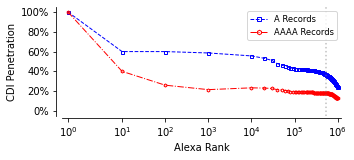

In [56]:
ov_fig, ov_ax = plt.subplots(figsize = (5, 2))

overviews = [(overview_v4, 'A Records', 's', 'blue', '--'), (overview_v6, 'AAAA Records', 'h', 'red', '-.')]

for ov, rec_type, marker, color, ls in overviews:
    ov_ax.plot(ov['top_max_rank'], ov['cdn_penetration'], 
               label = '%s' % rec_type, 
               marker = marker, 
               linewidth = 1, 
               markersize = 3,
               fillstyle = 'none',
               color = color,
               linestyle=ls)
    
# PLOT FORMATTING
ov_ax.set_xlabel('Alexa Rank')
ov_ax.set_ylabel('CDI Penetration')
ov_ax.set_xscale('symlog')
ov_ax.set_xlim([0.75, 1200000])
ov_ax.set_ylim([-0.05, 1.05])
ov_ax.legend(loc = 'upper right', fontsize = 'small', markerscale = 1.5)

yticks = np.arange(0.0, 1.01, 0.2)
yticklabels = np.array(list(map(lambda x: '{:.0%}'.format(x), yticks)))
ov_ax.set_yticks(yticks)
ov_ax.set_yticklabels(yticklabels)

ov_ax.grid(False)
ov_ax.spines['right'].set_color('none')
ov_ax.spines['top'].set_color('none')
ov_ax.yaxis.set_ticks_position('left')
ov_ax.xaxis.set_ticks_position('bottom')
ov_ax.spines['bottom'].set_position(('axes', -0.02))
ov_ax.spines['left'].set_position(('axes', -0.02))

ov_ax.axvline(num_sites.min()[0], linestyle=':', color='grey', alpha=0.5)

plt.show()

ov_fig.savefig('%s/cdn_pen_by_rank-HYBRID.pdf' % PLOT_PATH, bbox_inches = 'tight')

In [30]:
contribution_v4 = v4[v4['type'] == 'CDN div all']
contribution_v6 = v6[v6['type'] == 'CDN div all']

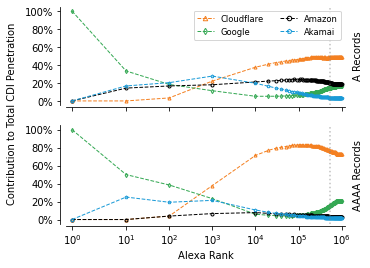

In [57]:
contrib_fig, (contrib_v4_ax, contrib_v6_ax) = plt.subplots(figsize = (5, 4), ncols = 1, nrows = 2, sharey = True)

col_google = '#34a853'
col_akamai = '#199ad7'
col_cloudflare = '#f48021'
col_amazon = 'black'
col_fastly = '#e72c2a'

contrib_v4 = [(contribution_v4[contribution_v4['cdn_name'] == 'Cloudflare'], 'Cloudflare', '^', col_cloudflare),
              (contribution_v4[contribution_v4['cdn_name'] == 'Google'], 'Google', 'd', col_google),
              (contribution_v4[contribution_v4['cdn_name'] == 'Amazon'], 'Amazon', 'o', col_amazon),
              (contribution_v4[contribution_v4['cdn_name'] == 'Akamai'], 'Akamai', 'p', col_akamai),
#               (contribution_v4[contribution_v4['cdn_name'] == 'Fastly'], 'Fastly', '', col_fastly)
             ]

contrib_v6 = [(contribution_v6[contribution_v6['cdn_name'] == 'Cloudflare'], 'Cloudflare', '^', col_cloudflare),
              (contribution_v6[contribution_v6['cdn_name'] == 'Google'], 'Google', 'd', col_google),
              (contribution_v6[contribution_v6['cdn_name'] == 'Amazon'], 'Amazon', 'o', col_amazon),
              (contribution_v6[contribution_v6['cdn_name'] == 'Akamai'], 'Akamai', 'p', col_akamai),
#               (contribution_v6[contribution_v6['cdn_name'] == 'Fastly'], 'Fastly', '', col_fastly)
             ]

for contrib, rec_type, marker, color in contrib_v4:    
    linestyle = '--'
    
    contrib_v4_ax.plot(contrib['top_max_rank'], contrib['cdn_penetration'], 
                       label = '%s' % rec_type, 
                       marker = marker, 
                       linewidth = 1, 
                       markersize = 3,
                       fillstyle = 'none',
                       linestyle = linestyle,
                       color = color)
    
for contrib, rec_type, marker, color in contrib_v6:
    linestyle = '--'
    
    contrib_v6_ax.plot(contrib['top_max_rank'], contrib['cdn_penetration'], 
                       label = '%s' % rec_type, 
                       marker = marker, 
                       linewidth = 1, 
                       markersize = 3,
                       fillstyle = 'none',
                       linestyle = linestyle,
                       color = color)
# PLOT FORMATTING

for contrib_ax, rec_type in [(contrib_v4_ax, 'A'), (contrib_v6_ax, 'AAAA')]:

    contrib_ax.set_xlabel('')
    contrib_ax.set_xscale('symlog')
    contrib_ax.set_xlim([0.75, 1200000])
    contrib_ax.set_ylim([-0.05, 1.05])

    yticks = np.arange(0.0, 1.01, 0.2)
    yticklabels = np.array(list(map(lambda x: '{:.0%}'.format(x), yticks)))
    contrib_ax.set_yticks(yticks)
    contrib_ax.set_yticklabels(yticklabels)
    
    contrib_ax.axvline(num_sites.min()[0], linestyle=':', color='grey', alpha=0.5)

    contrib_ax.grid(False)
    contrib_ax.spines['right'].set_color('none')
    contrib_ax.spines['top'].set_color('none')
    contrib_ax.yaxis.set_ticks_position('left')
    contrib_ax.xaxis.set_ticks_position('bottom')
    contrib_ax.spines['bottom'].set_position(('axes', -0.02))
    contrib_ax.spines['left'].set_position(('axes', -0.02))
    
    ax1_ = contrib_ax.twinx()
    ax1_.spines['right'].set_color('none')
    ax1_.spines['top'].set_color('none')
    ax1_.spines['left'].set_color('none')
    ax1_.spines['bottom'].set_color('none')
    ax1_.yaxis.set_ticks_position('none')
    ax1_.set_ylabel('%s Records' % rec_type)
    ax1_.yaxis.set_label_coords(1.03, 0.5)
    plt.setp(ax1_.get_yticklabels(), visible = False)
    
contrib_v4_ax.set_xticklabels([])
contrib_v6_ax.set_xlabel('Alexa Rank')

contrib_v4_ax.set_ylabel('')
contrib_v6_ax.set_ylabel('Contribution to Total CDI Penetration')
contrib_v6_ax.yaxis.set_label_coords(-0.175,1.125)

contrib_v4_ax.legend(loc = 'upper right', fontsize = 'small', ncol = 2, markerscale = 1.5)

plt.show()

contrib_fig.savefig('%s/cdn_pen_by_rank_contrib_without_total-HYBRID.pdf' % PLOT_PATH, bbox_inches = 'tight')

In [33]:
contribution_v4

,top_max_rank,query_type,cdn_penetration,cdn_name,type
1,1.0,A,0.000000,Cloudflare,CDN div all
3,1.0,A,0.000000,Amazon,CDN div all
5,1.0,A,1.000000,Google,CDN div all
7,1.0,A,0.000000,Akamai,CDN div all
9,1.0,A,0.000000,Microsoft,CDN div all
...,...,...,...,...,...
2174,1000000.0,A,0.025235,Fastly,CDN div all
2176,1000000.0,A,0.016071,WordPress,CDN div all
2178,1000000.0,A,0.014368,LeaseWeb CDN,CDN div all
2180,1000000.0,A,0.011993,Incapsula,CDN div all


In [34]:
contribution_v6

,top_max_rank,query_type,cdn_penetration,cdn_name,type
1,1.0,AAAA,0.000000,Cloudflare,CDN div all
3,1.0,AAAA,1.000000,Google,CDN div all
5,1.0,AAAA,0.000000,Amazon,CDN div all
7,1.0,AAAA,0.000000,Akamai,CDN div all
9,1.0,AAAA,0.000000,Fastly,CDN div all
...,...,...,...,...,...
2174,1000000.0,AAAA,0.004189,Netlify,CDN div all
2176,1000000.0,AAAA,0.001355,Microsoft,CDN div all
2178,1000000.0,AAAA,0.001048,Incapsula,CDN div all
2180,1000000.0,AAAA,0.000424,LeaseWeb CDN,CDN div all


In [35]:
google_v4 = contribution_v4[contribution_v4['cdn_name'] == 'Google']
google_v6 = contribution_v6[contribution_v6['cdn_name'] == 'Google']

In [36]:
blogspot = blogspot.rename(columns = {'blogspot_penetration' : 'cdn_penetration'})

In [37]:
blogspot

,top_max_rank,query_type,cdn_penetration
0,1.0,A,0.000000
1,1.0,AAAA,0.000000
2,10.0,A,0.000000
3,10.0,AAAA,0.000000
4,100.0,A,0.016667
...,...,...,...
203,980000.0,AAAA,0.072865
204,990000.0,A,0.072865
205,990000.0,AAAA,0.072865
206,1000000.0,A,0.072865


In [38]:
blogspot_v4 = blogspot[blogspot['query_type'] == 'A']
blogspot_v6 = blogspot[blogspot['query_type'] == 'AAAA']

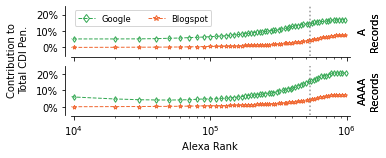

In [79]:
gb_fig, (gb_ax_v4, gb_ax_v6) = plt.subplots(figsize = (5, 2), ncols = 1, nrows = 2, sharey = True)

google_curves = [(google_v4, 'Google', 'd', col_google, gb_ax_v4, 'A'),
                 (google_v6, 'Google', 'd', col_google, gb_ax_v6, 'AAAA')
                ]

blogspot_curves = [(blogspot_v4, 'Blogspot', '*', '#f06a35', gb_ax_v4, 'A'),
                   (blogspot_v6, 'Blogspot', '*', '#f06a35', gb_ax_v6, 'AAAA')
                  ]

for curve in [google_curves, blogspot_curves]:

    for df, rec_type, marker, color, ax, label in curve:    
        ax.plot(df['top_max_rank'], df['cdn_penetration'], 
                label = '%s' % rec_type, 
                marker = marker, 
                linewidth = 1, 
                markersize = 4,
                fillstyle = 'none',
                linestyle = '--',
                color = color,
                markevery = 0.01)

        ax.set_xlabel('')
        ax.set_xscale('log')
        ax.set_xlim([9500, 1050000])
        ax.set_ylim([-0.05, 0.25])

        yticks = np.arange(0.0, 0.25, 0.1)
        yticklabels = np.array(list(map(lambda x: '{:.0%}'.format(x), yticks)))
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticklabels)
        
        ax.axvline(num_sites.min()[0], linestyle=':', color='grey', alpha=0.5)

        ax.grid(False)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('axes', -0.02))
        ax.spines['left'].set_position(('axes', -0.02))

        ax1_ = ax.twinx()
        ax1_.spines['right'].set_color('none')
        ax1_.spines['top'].set_color('none')
        ax1_.spines['left'].set_color('none')
        ax1_.spines['bottom'].set_color('none')
        ax1_.yaxis.set_ticks_position('none')
        ax1_.set_ylabel('%s\nRecords' % label)
        ax1_.yaxis.set_label_coords(1.03, 0.5)
        plt.setp(ax1_.get_yticklabels(), visible = False)
    
gb_ax_v4.set_xticklabels([])
gb_ax_v6.set_xlabel('Alexa Rank')

gb_ax_v4.set_ylabel('')
gb_ax_v6.set_ylabel('Contribution to\nTotal CDI Pen.')
gb_ax_v6.yaxis.set_label_coords(-0.15,1.125)

gb_ax_v4.legend(loc = 'upper left', fontsize = 'small', ncol = 2, markerscale = 1.5)

plt.show()

gb_fig.savefig('%s/cdn_pen_by_rank_google_blogspot-HYBRID.pdf' % PLOT_PATH, bbox_inches = 'tight')

In [40]:
contribution_v4[contribution_v4['cdn_name'] == 'Cloudflare']['cdn_penetration'].max()

0.49164378775021217

In [41]:
contribution_v6[contribution_v6['cdn_name'] == 'Cloudflare']['cdn_penetration'].max()

0.8310071825008162

In [42]:
overview_v4[overview_v4['top_max_rank'] == 530000]

,top_max_rank,query_type,cdn_penetration,cdn_name,type
1176,530000.0,A,0.370458,All,All


In [43]:
overview_v6[overview_v6['top_max_rank'] == 530000]

,top_max_rank,query_type,cdn_penetration,cdn_name,type
1176,530000.0,AAAA,0.181808,All,All


In [44]:
overview_v4.tail()

,top_max_rank,query_type,cdn_penetration,cdn_name,type
2079,960000.0,A,0.252946,All,All
2100,970000.0,A,0.250338,All,All
2121,980000.0,A,0.247784,All,All
2142,990000.0,A,0.245281,All,All
2163,1000000.0,A,0.242828,All,All


In [45]:
overview_v6.tail()

,top_max_rank,query_type,cdn_penetration,cdn_name,type
2079,960000.0,AAAA,0.130701,All,All
2100,970000.0,AAAA,0.129354,All,All
2121,980000.0,AAAA,0.128034,All,All
2142,990000.0,AAAA,0.126740,All,All
2163,1000000.0,AAAA,0.125473,All,All


In [46]:
contribution_v4[contribution_v4['cdn_name'] == 'Akamai']

,top_max_rank,query_type,cdn_penetration,cdn_name,type
7,1.0,A,0.000000,Akamai,CDN div all
28,10.0,A,0.166667,Akamai,CDN div all
49,100.0,A,0.203390,Akamai,CDN div all
70,1000.0,A,0.276451,Akamai,CDN div all
91,10000.0,A,0.196656,Akamai,CDN div all
...,...,...,...,...,...
2086,960000.0,A,0.032344,Akamai,CDN div all
2107,970000.0,A,0.032344,Akamai,CDN div all
2128,980000.0,A,0.032344,Akamai,CDN div all
2149,990000.0,A,0.032344,Akamai,CDN div all


In [47]:
contribution_v6[contribution_v6['cdn_name'] == 'Akamai']

,top_max_rank,query_type,cdn_penetration,cdn_name,type
7,1.0,AAAA,0.000000,Akamai,CDN div all
28,10.0,AAAA,0.250000,Akamai,CDN div all
49,100.0,AAAA,0.192308,Akamai,CDN div all
70,1000.0,AAAA,0.213270,Akamai,CDN div all
91,10000.0,AAAA,0.106319,Akamai,CDN div all
...,...,...,...,...,...
2086,960000.0,AAAA,0.014716,Akamai,CDN div all
2107,970000.0,AAAA,0.014716,Akamai,CDN div all
2128,980000.0,AAAA,0.014716,Akamai,CDN div all
2149,990000.0,AAAA,0.014716,Akamai,CDN div all


In [48]:
contribution_v4[contribution_v4['cdn_name'] == 'Fastly']

,top_max_rank,query_type,cdn_penetration,cdn_name,type
11,1.0,A,0.000000,Fastly,CDN div all
32,10.0,A,0.125000,Fastly,CDN div all
53,100.0,A,0.100000,Fastly,CDN div all
74,1000.0,A,0.093596,Fastly,CDN div all
95,10000.0,A,0.055914,Fastly,CDN div all
...,...,...,...,...,...
2090,960000.0,A,0.025235,Fastly,CDN div all
2111,970000.0,A,0.025235,Fastly,CDN div all
2132,980000.0,A,0.025235,Fastly,CDN div all
2153,990000.0,A,0.025235,Fastly,CDN div all


In [49]:
contribution_v6[contribution_v6['cdn_name'] == 'Fastly']

,top_max_rank,query_type,cdn_penetration,cdn_name,type
9,1.0,AAAA,0.000000,Fastly,CDN div all
30,10.0,AAAA,0.000000,Fastly,CDN div all
51,100.0,AAAA,0.038462,Fastly,CDN div all
72,1000.0,AAAA,0.037915,Fastly,CDN div all
93,10000.0,AAAA,0.018511,Fastly,CDN div all
...,...,...,...,...,...
2088,960000.0,AAAA,0.010617,Fastly,CDN div all
2109,970000.0,AAAA,0.010617,Fastly,CDN div all
2130,980000.0,AAAA,0.010617,Fastly,CDN div all
2151,990000.0,AAAA,0.010617,Fastly,CDN div all


In [50]:
contribution_v4[contribution_v4['cdn_name'] == 'Microsoft']

,top_max_rank,query_type,cdn_penetration,cdn_name,type
9,1.0,A,0.000000,Microsoft,CDN div all
30,10.0,A,0.000000,Microsoft,CDN div all
51,100.0,A,0.083333,Microsoft,CDN div all
72,1000.0,A,0.015437,Microsoft,CDN div all
93,10000.0,A,0.016756,Microsoft,CDN div all
...,...,...,...,...,...
2088,960000.0,A,0.028130,Microsoft,CDN div all
2109,970000.0,A,0.028130,Microsoft,CDN div all
2130,980000.0,A,0.028130,Microsoft,CDN div all
2151,990000.0,A,0.028130,Microsoft,CDN div all


In [51]:
contribution_v6[contribution_v6['cdn_name'] == 'Microsoft']

,top_max_rank,query_type,cdn_penetration,cdn_name,type
13,1.0,AAAA,0.000000,Microsoft,CDN div all
34,10.0,AAAA,0.000000,Microsoft,CDN div all
55,100.0,AAAA,0.115385,Microsoft,CDN div all
76,1000.0,AAAA,0.018957,Microsoft,CDN div all
97,10000.0,AAAA,0.003659,Microsoft,CDN div all
...,...,...,...,...,...
2092,960000.0,AAAA,0.001355,Microsoft,CDN div all
2113,970000.0,AAAA,0.001355,Microsoft,CDN div all
2134,980000.0,AAAA,0.001355,Microsoft,CDN div all
2155,990000.0,AAAA,0.001355,Microsoft,CDN div all


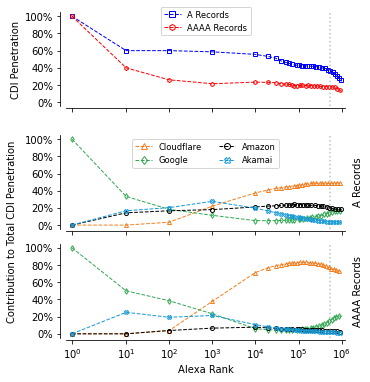

In [78]:
fig, (ov_ax, dummy_ax, contrib_v4_ax, contrib_v6_ax) = plt.subplots(figsize = (5, 6),
                                                                    ncols = 1, nrows = 4,
                                                                    gridspec_kw={'height_ratios': [1, 0.0001, 1, 1]},
                                                                    sharey = True)

dummy_ax.set_visible(False)  # to add some space between ov and contrib plots

# =================================================================================

overviews = [(overview_v4, 'A Records', 's', 'blue'), (overview_v6, 'AAAA Records', 'h', 'red')]

for ov, rec_type, marker, color in overviews:
    ov_ax.plot(ov['top_max_rank'], ov['cdn_penetration'], 
               label = '%s' % rec_type, 
               marker = marker, 
               linewidth = 1, 
               markersize = 4,
               fillstyle = 'none',
               color = color,
               linestyle='--',
               markevery = 0.01)

# PLOT FORMATTING
ov_ax.set_ylabel('CDI Penetration')
ov_ax.set_xscale('symlog')
ov_ax.set_xlim([0.75, 1200000])
ov_ax.set_ylim([-0.05, 1.05])
ov_ax.legend(loc = 'upper center', fontsize = 'small', markerscale = 1.5, bbox_to_anchor=(0.5,1.1))

yticks = np.arange(0.0, 1.01, 0.2)
yticklabels = np.array(list(map(lambda x: '{:.0%}'.format(x), yticks)))
ov_ax.set_yticks(yticks)
ov_ax.set_yticklabels(yticklabels)

ov_ax.set_xticklabels([])

ov_ax.grid(False)
ov_ax.spines['right'].set_color('none')
ov_ax.spines['top'].set_color('none')
ov_ax.yaxis.set_ticks_position('left')
ov_ax.xaxis.set_ticks_position('bottom')
ov_ax.spines['bottom'].set_position(('axes', -0.02))
ov_ax.spines['left'].set_position(('axes', -0.02))

ov_ax.axvline(num_sites.min()[0], linestyle=':', color='grey', alpha=0.5)

# =================================================================================

col_google = '#34a853'
col_akamai = '#199ad7'
col_cloudflare = '#f48021'
col_amazon = 'black'
col_fastly = '#e72c2a'

contrib_v4 = [(contribution_v4[contribution_v4['cdn_name'] == 'Cloudflare'], 'Cloudflare', '^', col_cloudflare),
              (contribution_v4[contribution_v4['cdn_name'] == 'Google'], 'Google', 'd', col_google),
              (contribution_v4[contribution_v4['cdn_name'] == 'Amazon'], 'Amazon', 'o', col_amazon),
              (contribution_v4[contribution_v4['cdn_name'] == 'Akamai'], 'Akamai', 'X', col_akamai),
#               (contribution_v4[contribution_v4['cdn_name'] == 'Fastly'], 'Fastly', '', col_fastly)
             ]

contrib_v6 = [(contribution_v6[contribution_v6['cdn_name'] == 'Cloudflare'], 'Cloudflare', '^', col_cloudflare),
              (contribution_v6[contribution_v6['cdn_name'] == 'Google'], 'Google', 'd', col_google),
              (contribution_v6[contribution_v6['cdn_name'] == 'Amazon'], 'Amazon', 'o', col_amazon),
              (contribution_v6[contribution_v6['cdn_name'] == 'Akamai'], 'Akamai', 'X', col_akamai),
#               (contribution_v6[contribution_v6['cdn_name'] == 'Fastly'], 'Fastly', '', col_fastly)
             ]


for contrib, rec_type, marker, color in contrib_v4:    
    linestyle = '--'
    
    contrib_v4_ax.plot(contrib['top_max_rank'], contrib['cdn_penetration'], 
                       label = '%s' % rec_type, 
                       marker = marker, 
                       linewidth = 1, 
                       markersize = 4,
                       fillstyle = 'none',
                       linestyle = linestyle,
                       color = color,
                       markevery = 0.01)
    
for contrib, rec_type, marker, color in contrib_v6:
    linestyle = '--'
    
    contrib_v6_ax.plot(contrib['top_max_rank'], contrib['cdn_penetration'], 
                       label = '%s' % rec_type, 
                       marker = marker, 
                       linewidth = 1, 
                       markersize = 4,
                       fillstyle = 'none',
                       linestyle = linestyle,
                       color = color,
                       markevery = 0.01)
# PLOT FORMATTING

for contrib_ax, rec_type in [(contrib_v4_ax, 'A'), (contrib_v6_ax, 'AAAA')]:

    contrib_ax.set_xlabel('')
    contrib_ax.set_xscale('symlog')
    contrib_ax.set_xlim([0.75, 1200000])
    contrib_ax.set_ylim([-0.05, 1.05])

    yticks = np.arange(0.0, 1.01, 0.2)
    yticklabels = np.array(list(map(lambda x: '{:.0%}'.format(x), yticks)))
    contrib_ax.set_yticks(yticks)
    contrib_ax.set_yticklabels(yticklabels)
    
    contrib_ax.axvline(num_sites.min()[0], linestyle=':', color='grey', alpha=0.5)

    contrib_ax.grid(False)
    contrib_ax.spines['right'].set_color('none')
    contrib_ax.spines['top'].set_color('none')
    contrib_ax.yaxis.set_ticks_position('left')
    contrib_ax.xaxis.set_ticks_position('bottom')
    contrib_ax.spines['bottom'].set_position(('axes', -0.02))
    contrib_ax.spines['left'].set_position(('axes', -0.02))
    
    ax1_ = contrib_ax.twinx()
    ax1_.spines['right'].set_color('none')
    ax1_.spines['top'].set_color('none')
    ax1_.spines['left'].set_color('none')
    ax1_.spines['bottom'].set_color('none')
    ax1_.yaxis.set_ticks_position('none')
    ax1_.set_ylabel('%s Records' % rec_type)
    ax1_.yaxis.set_label_coords(1.03, 0.5)
    plt.setp(ax1_.get_yticklabels(), visible = False)
    
contrib_v4_ax.set_xticklabels([])
contrib_v6_ax.set_xlabel('Alexa Rank')

contrib_v4_ax.set_ylabel('')
contrib_v6_ax.set_ylabel('Contribution to Total CDI Penetration')
contrib_v6_ax.yaxis.set_label_coords(-0.175,1.125)

contrib_v4_ax.legend(loc = 'upper center', fontsize = 'small', ncol = 2, markerscale = 1.5)

plt.show()

fig.savefig('%s/alexa-top1m-pen-HYBRID.pdf' % PLOT_PATH, bbox_inches = 'tight')